In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

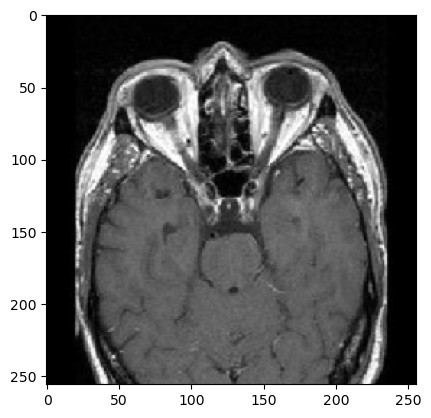

In [5]:
plt.imshow(X[0], cmap='gray')

In [6]:
X[0].shape

(256, 256)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [8]:
xtrain.shape, xtest.shape

((977, 256, 256), (245, 256, 256))

In [9]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D

In [10]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape = (256, 256)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='softmax'))

In [11]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [18]:
r = model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest,ytest), batch_size=32)

Epoch 1/10
31/31 [==============================] - 1s 44ms/step - loss: 0.1585 - accuracy: 0.9365 - val_loss: 0.1637 - val_accuracy: 0.9388
Epoch 2/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1689 - accuracy: 0.9355 - val_loss: 0.1775 - val_accuracy: 0.9592
Epoch 3/10
31/31 [==============================] - 2s 49ms/step - loss: 0.1192 - accuracy: 0.9529 - val_loss: 0.1255 - val_accuracy: 0.9714
Epoch 4/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1128 - accuracy: 0.9560 - val_loss: 0.1248 - val_accuracy: 0.9755
Epoch 5/10
31/31 [==============================] - 1s 45ms/step - loss: 0.0951 - accuracy: 0.9693 - val_loss: 0.2297 - val_accuracy: 0.9429
Epoch 6/10
31/31 [==============================] - 1s 45ms/step - loss: 0.1576 - accuracy: 0.9447 - val_loss: 0.2114 - val_accuracy: 0.9224
Epoch 7/10
31/31 [==============================] - 1s 44ms/step - loss: 0.1188 - accuracy: 0.9498 - val_loss: 0.1946 - val_accuracy: 0.9388
Epoch 8/10
31

In [19]:
# let's extract features from convolutional network for XBG
feature_extractor = model.predict(xtrain)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

31/31 [==============================] - 0s 10ms/step


In [20]:
# perform same operation on test dataset
feature_extractor_test = model.predict(xtest)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

8/8 [==============================] - 0s 11ms/step


In [22]:
# defining XGBoost Classifier model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_features, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [23]:
prediction = model.predict(X_test_features)

In [24]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [25]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [27]:
# plt.figure(figsize=(12,8))
# p = os.listdir('brain_tumor/Testing/')
# c=1
# for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
#     plt.subplot(3,3,c)
    
#     img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
#     img1 = cv2.resize(img, (256,256))
#     img1 = img1.reshape(1, 256, 256)
#     p = model.predict(img1)
# #     print(p)
#     if p[0][0]>=.5:
#         plt.title(dec[0])
#     else:
#         plt.title(dec[1])
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     c+=1

In [ ]:
# plt.figure(figsize=(12,8))
# p = os.listdir('brain_tumor/Testing/')
# c=1
# for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
#     plt.subplot(4,4,c)
    
#     img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
#     img1 = cv2.resize(img, (256,256))
#     img1 = img1.reshape(1, 256, 256)
#     p = model.predict(img1)
# #     print(p)
#     print(p[0][0])
#     if p[0][0]>=.5:
#         plt.title(dec[0])
#     else:
#         plt.title(dec[1])
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     c+=1
    

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("Bidirectional-GRU Model Metrics")
print('Accuracy: ', accuracy_score(ytest, prediction))
print('Precision: ', precision_score(ytest, prediction))
print('F1 Score: ', f1_score(ytest, prediction))
print('Recall Score: ', recall_score(ytest, prediction))
print('Roc Auc Score: ', roc_auc_score(ytest, prediction))

Bidirectional-GRU Model Metrics
Accuracy:  0.9510204081632653
Precision:  0.9470588235294117
F1 Score:  0.9640718562874251
Recall Score:  0.9817073170731707
Roc Auc Score:  0.9352981029810297


In [ ]:
# import pickle
# # save the model to disk
# filename = 'CNN_GRU.sav'
# pickle.dump(model, open(filename, 'wb'))

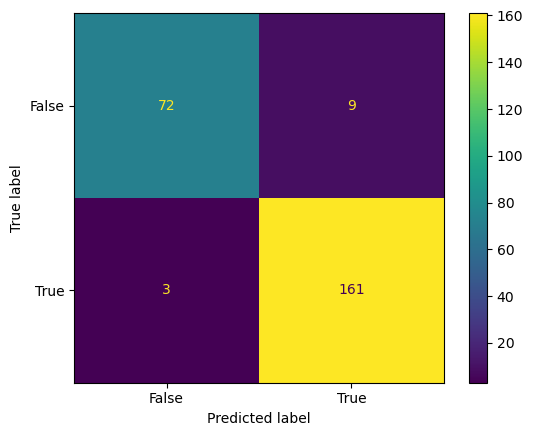

In [29]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

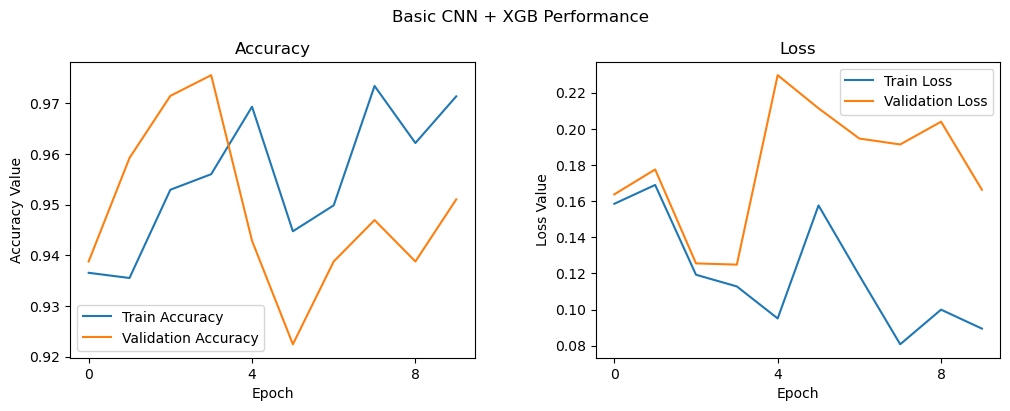

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN + XGB Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.savefig('CNN + XGB Performance.png')